# Тестовое задание

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
import datetime

## Предобработка данных

In [2]:
df = pd.read_csv('data.csv', sep=',', encoding = 'cp1251')
df.head()

,Unnamed: 0,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,payment_type,is_service_delivery,latitude,longitude,make_fast_as_possible,date_of_finish_cooking,date_of_visit,place_id,state,user_count,created_d,clear_price,created_m
0,0,3b182b55-2816-418b-930f-eb30a7e0bee5,1459.0,1749.0,1749.0,437.7,30.0,e0f8cc88-4a5e-4870-b668-50f1a95ca326,bad3d57d-4760-43e3-891f-c6f6fb123499,2019-05-29 12:43:51.299000+03:00,long_distance,card-online,True,45.117107,39.037530,True,2019-05-29 13:08:00+03:00,2019-05-29 14:00:00+03:00,3280e083-900f-44f8-8bbe-a1618d4bc1ae,finished,1,2019-05-29,1311.3,2019-05-29 12:43:51.299000+03:00
1,1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,370.0,560.0,560.0,92.5,25.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f2eaebdf-7878-463a-91b9-20616fdcd4cf,2019-06-17 20:18:55.371000+03:00,default,cash,True,45.040642,38.981243,True,2019-06-17 20:43:00+03:00,2019-06-17 21:05:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-17,467.5,2019-06-17 20:18:55.371000+03:00
2,2,cccccce8-e75c-4ab3-892d-182ebb0f5776,860.0,1000.0,1000.0,197.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f6ef3117-23fb-4a89-93d6-6a13092c27f6,2019-06-10 18:09:35.273000+03:00,default,cash,True,45.037470,38.946109,True,2019-06-10 18:34:00+03:00,2019-06-10 19:00:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,0,2019-06-10,802.2,2019-06-10 18:09:35.273000+03:00
3,3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,2860.0,2860.0,2860.0,657.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,2019-06-10 17:38:28.019000+03:00,default,card-online,True,45.055747,38.998247,True,2019-06-10 18:03:00+03:00,2019-06-10 18:30:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-10,2202.2,2019-06-10 17:38:28.019000+03:00
4,4,70b630d5-c93e-4adf-9db0-01a90ccbae50,350.0,750.0,750.0,0.0,0.0,7f74022a-0930-435d-baf4-d28672d08889,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,2019-06-17 20:23:18.112000+03:00,long_distance,cash,True,45.125139,39.012207,True,2019-06-17 20:40:00+03:00,2019-06-17 21:20:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-17,750.0,2019-06-17 20:23:18.112000+03:00


Для выполенния работы дана таблица с 20 столбцами, в таблице есть числовые данные, текстовые и даты.

In [3]:
df.duplicated().sum()

0

Дубликатов в таблице нет, можно работать дальше

In [4]:
df.isnull().sum()

Unnamed: 0                0
id                        0
price                     0
full_price                0
final_price               0
agent_amount              0
agent_percent             0
application_id            0
client_id                 0
created                   0
delivery_type             0
payment_type              0
is_service_delivery       0
latitude                  0
longitude                 0
make_fast_as_possible     0
date_of_finish_cooking    0
date_of_visit             0
place_id                  0
state                     0
user_count                0
created_d                 0
clear_price               0
created_m                 0
dtype: int64

В таблице есть пропущенные значения в 4 столбцах. Пропущенные значения можно заполнить нулями или удалить их. Данные пропущены не во всех столбцах, только в ID приложения, широте и долготе, и места, откуда был сделан заказ. Предлагаю для работы пустые значения убрать. Информацию необходимо передать разработчикам, чтобы минимизировать потерю данных. 

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109848 entries, 0 to 109847
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              109848 non-null  int64  
 1   id                      109848 non-null  object 
 2   price                   109848 non-null  float64
 3   full_price              109848 non-null  float64
 4   final_price             109848 non-null  float64
 5   agent_amount            109848 non-null  float64
 6   agent_percent           109848 non-null  float64
 7   application_id          109848 non-null  object 
 8   client_id               109848 non-null  object 
 9   created                 109848 non-null  object 
 10  delivery_type           109848 non-null  object 
 11  payment_type            109848 non-null  object 
 12  is_service_delivery     109848 non-null  bool   
 13  latitude                109848 non-null  float64
 14  longitude           

Приведем столбцы с датами к формату дат

In [7]:
df['created'] = pd.to_datetime(df['created'])
df['date_of_finish_cooking'] = pd.to_datetime(df['date_of_finish_cooking'])
df['date_of_visit'] = pd.to_datetime(df['date_of_visit'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109848 entries, 0 to 109847
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype                                
---  ------                  --------------   -----                                
 0   Unnamed: 0              109848 non-null  int64                                
 1   id                      109848 non-null  object                               
 2   price                   109848 non-null  float64                              
 3   full_price              109848 non-null  float64                              
 4   final_price             109848 non-null  float64                              
 5   agent_amount            109848 non-null  float64                              
 6   agent_percent           109848 non-null  float64                              
 7   application_id          109848 non-null  object                               
 8   client_id               109848 non-null  obj

### Исследовательский анализ данных

In [9]:
df['client_id'].nunique()

24813

У нас есть 24813 уникальных пользователя сервиса. Предлагаю посмотреть сколько вообще заказов делают пользователи каждый день.

### Сколько заказов делают пользователи в день

In [10]:
df['created_d'] = df['created'].dt.to_period('d')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [11]:
cnt = df.groupby(['created_d']).agg({'id':'count'}).reset_index()
cnt.head()

,created_d,id
0,2018-04-16,46
1,2018-04-17,45
2,2018-04-18,39
3,2018-04-19,74
4,2018-04-20,90


<Figure size 1080x360 with 0 Axes>

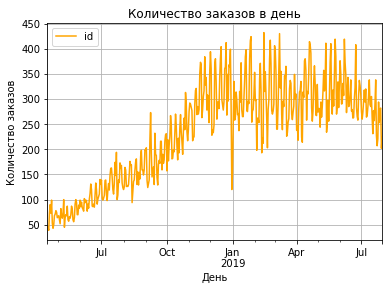

In [12]:
plt.figure(figsize=(15, 5))
cnt.plot(x='created_d', color='orange')
plt.title('Количество заказов в день')
plt.ylabel('Количество заказов')
plt.xlabel('День')
plt.grid()
plt.show();

С начала запуска сервиса ежедневно делают заказы больше пользователей примерно до начала 2019 года. В январе есть просадка (связанная с новогодними праздниками), далее график распределен относительно равномерно

In [13]:
cnt['id'].mean()

233.22292993630575

В среднем за 15 месяцев пользователи делают 233 заказа в месяц

In [14]:
cnt_t = cnt.query('created_d >= "2019-01-01"')

In [15]:
cnt_t['id'].mean()

302.042654028436

Но если посмотреть с начала 2019 года, то число заметно увеличается - 302 заказа в среднем в день

### Какой средний чек покупки

In [16]:
df['final_price'].mean()

1318.8525047338167

За период (чуть больше года) средний чек 1319 рублей.

### Каким способом чаще всего оплачивают покупки пользователи

In [17]:
df['payment_type'].unique()

array(['card-online', 'cash', 'apple-pay', 'samsung-pay', 'android-pay',
       'card', 'card-partner'], dtype=object)

In [18]:
pay = df.groupby(['payment_type']).agg({'client_id':'count'}).reset_index().sort_values(by='client_id', ascending=False)
pay

,payment_type,client_id
5,cash,40280
3,card-online,31276
1,apple-pay,30881
4,card-partner,6874
2,card,243
0,android-pay,187
6,samsung-pay,107


На первый взгляд можно сказать, что пользователи чаще всего оплачивают наличными, однако если посмотреть более внимательно, то становится видно, что все остальные способы по сути являются бесконтактной формой оплаты, поэтому можно сказать, что наличные занимают второе место, после оплаты безналичным расчетом.

### Отличается ли средний чек у пользователей, которые оплачивают наличными и безналичным способом

In [19]:
pay_m = df.groupby(['payment_type']).agg({'client_id':'count', 'final_price':'mean'}).reset_index().sort_values(by='client_id', ascending=False)
pay_m

,payment_type,client_id,final_price
5,cash,40280,1344.318480
3,card-online,31276,1368.811208
1,apple-pay,30881,1371.418475
4,card-partner,6874,708.701193
2,card,243,1365.279424
0,android-pay,187,1158.131551
6,samsung-pay,107,1331.801869


Средний чек у всех групп одинаковый. Очень сильно выделяются пользователи, которые оплачивают картой партнера, у них средний чек ниже почти в 2 раза. А также необходимо подтянуть средний чек пользователей, который используют android-pay хотя бы до общего среднего значения

### Какой средний процент агентской комиссии

In [20]:
df['agent_percent'].mean()

22.38237382564999

22,4% - Достаточно большой размер комиссии, необходимо увеличивать средний чек, чтобы уменьшить этот показатель

### Какой средний чек без учета агентской комиссии (чистый)

In [21]:
df['clear_price'] = df['final_price'] - df['agent_amount']

In [22]:
df['clear_price'].mean()

1048.5937199584748

Средний размер комиссии действительно составляет 22%

### Какой Retention у пользователей

In [23]:
df['created_m'] = pd.to_datetime(df['created'], format='%Y-%m-%d')

In [24]:
df.head()

,Unnamed: 0,id,price,full_price,final_price,agent_amount,agent_percent,application_id,client_id,created,delivery_type,payment_type,is_service_delivery,latitude,longitude,make_fast_as_possible,date_of_finish_cooking,date_of_visit,place_id,state,user_count,created_d,clear_price,created_m
0,0,3b182b55-2816-418b-930f-eb30a7e0bee5,1459.0,1749.0,1749.0,437.7,30.0,e0f8cc88-4a5e-4870-b668-50f1a95ca326,bad3d57d-4760-43e3-891f-c6f6fb123499,2019-05-29 12:43:51.299000+03:00,long_distance,card-online,True,45.117107,39.037530,True,2019-05-29 13:08:00+03:00,2019-05-29 14:00:00+03:00,3280e083-900f-44f8-8bbe-a1618d4bc1ae,finished,1,2019-05-29,1311.3,2019-05-29 12:43:51.299000+03:00
1,1,8faeffb3-28b9-4a99-bbd9-8a94128c1b16,370.0,560.0,560.0,92.5,25.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f2eaebdf-7878-463a-91b9-20616fdcd4cf,2019-06-17 20:18:55.371000+03:00,default,cash,True,45.040642,38.981243,True,2019-06-17 20:43:00+03:00,2019-06-17 21:05:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-17,467.5,2019-06-17 20:18:55.371000+03:00
2,2,cccccce8-e75c-4ab3-892d-182ebb0f5776,860.0,1000.0,1000.0,197.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,f6ef3117-23fb-4a89-93d6-6a13092c27f6,2019-06-10 18:09:35.273000+03:00,default,cash,True,45.037470,38.946109,True,2019-06-10 18:34:00+03:00,2019-06-10 19:00:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,0,2019-06-10,802.2,2019-06-10 18:09:35.273000+03:00
3,3,997cb653-ef4c-4c4b-b251-308b66ad2aa0,2860.0,2860.0,2860.0,657.8,23.0,adb21ae9-8f0e-48ee-816c-e85572ff6fbb,bd8a7330-289c-4fc1-b8f9-0f4700bdc26d,2019-06-10 17:38:28.019000+03:00,default,card-online,True,45.055747,38.998247,True,2019-06-10 18:03:00+03:00,2019-06-10 18:30:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-10,2202.2,2019-06-10 17:38:28.019000+03:00
4,4,70b630d5-c93e-4adf-9db0-01a90ccbae50,350.0,750.0,750.0,0.0,0.0,7f74022a-0930-435d-baf4-d28672d08889,e73e2099-ae9a-43f4-9c7c-31e005d59ad5,2019-06-17 20:23:18.112000+03:00,long_distance,cash,True,45.125139,39.012207,True,2019-06-17 20:40:00+03:00,2019-06-17 21:20:00+03:00,16850670-d37c-4647-b529-28911e16695d,finished,1,2019-06-17,750.0,2019-06-17 20:23:18.112000+03:00


In [25]:
m = df.groupby('client_id').agg({'created_m':'min'}).reset_index().rename(columns={'created_m':'first_created'})

In [26]:
d = df.merge(m, on='client_id')

In [27]:
d['first_created1'] = d['first_created'].dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [28]:
d['act_created'] = d['created'].dt.to_period('M')

In [29]:
d['cohort_lifetime'] = d['act_created'].astype('int') - d['first_created1'].astype('int')

In [30]:
d['cohort_lifetime'] = d['cohort_lifetime'].round().astype('int')

In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109848 entries, 0 to 109847
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype                                
---  ------                  --------------   -----                                
 0   Unnamed: 0              109848 non-null  int64                                
 1   id                      109848 non-null  object                               
 2   price                   109848 non-null  float64                              
 3   full_price              109848 non-null  float64                              
 4   final_price             109848 non-null  float64                              
 5   agent_amount            109848 non-null  float64                              
 6   agent_percent           109848 non-null  float64                              
 7   application_id          109848 non-null  object                               
 8   client_id               109848 non-null  obj

In [32]:
cohorts = d.groupby(['first_created1', 'cohort_lifetime']).agg({'client_id':'nunique'}).reset_index()

In [33]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_created1', 'client_id']]
initial_users_count = initial_users_count.rename(columns={'client_id':'cohorts_users'})

In [34]:
cohorts = cohorts.merge(initial_users_count, on='first_created1')

In [35]:
cohorts['retention'] = cohorts['client_id']/cohorts['cohorts_users']

In [36]:
cohorts['first_created1'] = cohorts['first_created1'].dt.strftime('%Y-%m')

In [37]:
retention_pivot = cohorts.pivot_table(index='first_created1', columns='cohort_lifetime', values='retention', aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_created1,,,,,,,,,,,,,,,,
2018-04,1.0,0.45873,0.42381,0.403175,0.379365,0.353968,0.353968,0.352381,0.355556,0.352381,0.366667,0.342857,0.311111,0.312698,0.309524,0.274603
2018-05,1.0,0.364387,0.334906,0.318396,0.330189,0.325472,0.317217,0.310142,0.283019,0.277123,0.28184,0.28066,0.254717,0.246462,0.226415,
2018-06,1.0,0.329718,0.254881,0.296095,0.275488,0.278742,0.272234,0.261388,0.239696,0.247289,0.237527,0.20282,0.241866,0.204989,,
2018-07,1.0,0.276646,0.248433,0.213166,0.201411,0.210815,0.19906,0.18652,0.204545,0.184953,0.178683,0.194357,0.166144,,,
2018-08,1.0,0.235388,0.203363,0.191353,0.197758,0.185749,0.155324,0.163331,0.156926,0.155324,0.156125,0.147318,,,,
2018-09,1.0,0.25621,0.207239,0.210788,0.17885,0.163236,0.162527,0.146203,0.145493,0.141945,0.131299,,,,,
2018-10,1.0,0.268577,0.240977,0.188429,0.156051,0.144374,0.131104,0.130042,0.122081,0.107219,,,,,,
2018-11,1.0,0.240864,0.175246,0.116699,0.113949,0.100196,0.100982,0.0954813,0.0766208,,,,,,,
2018-12,1.0,0.215531,0.115293,0.105388,0.0875594,0.0923138,0.0796355,0.0681458,,,,,,,,


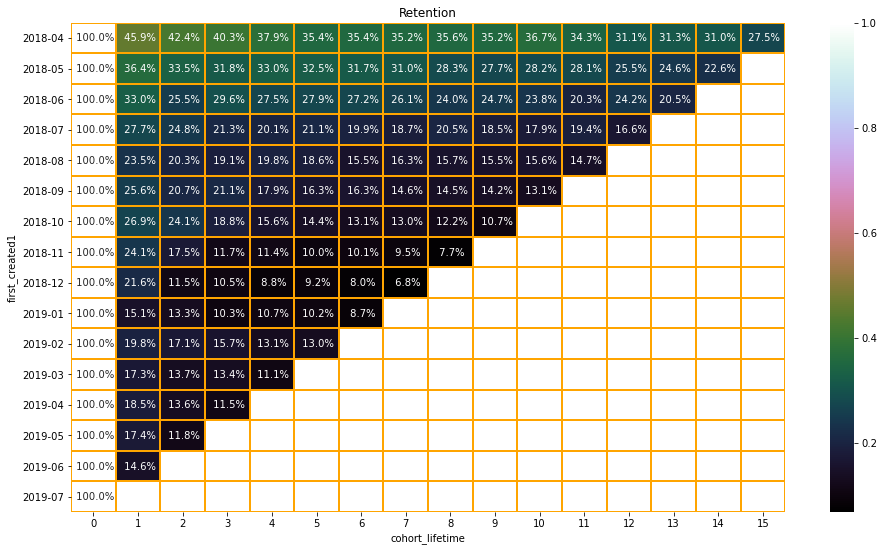

In [38]:
plt.figure(figsize=(16, 9))
plt.title('Retention')
sns.heatmap(retention_pivot, annot=True, linewidths=1, fmt=' .1%', linecolor='orange', cmap="cubehelix");

Как видно на графике, больше всего возвращаются клиенты из первой когорты. На второй месяц она показывает рекордные 42,4% - это достаточно хороший показатель. Однако если посмотреть чуть ниже, то начинается сильная просадка до 7%. Возможно первым клиентам давали какие-нибудь "плюшки", за счет которых они так активно продолжили делать заказ. Для полноты картины исследуем данные дальше.

Для повышения "Retention" рекомендую:
- более детально изучить какие факторы повлияли на более высокий процент возвращаемости у когорт, которых процент возвращаемости на второй месяц больше 15%. Особенно первые 2 когорты, их можно считать эталонными.
- подтянуть пользователей из когорт, в которых на второй месяц Retention меньше 20% - добавить промоакции, купоны, добавить в рекламные кампании или дополнительные способы привлечения пользователей.

In [39]:
retention_pivot.to_csv('rt.csv', encoding='cp1251', sep=',')

### Сколько в среднем заказов приходится на одного пользователя

In [40]:
cohort_orders = d.groupby(['first_created1', 'cohort_lifetime']).agg({'final_price':'count', 'client_id':'nunique'}).reset_index()

In [41]:
cohort_orders['purchases'] = cohort_orders['final_price']/cohort_orders['client_id']
mean_value = cohort_orders['purchases'].mean()
cohort_orders.head()

,first_created1,cohort_lifetime,final_price,client_id,purchases
0,2018-04,0,968,630,1.536508
1,2018-04,1,898,289,3.107266
2,2018-04,2,774,267,2.898876
3,2018-04,3,733,254,2.885827
4,2018-04,4,703,239,2.941423


In [42]:
purchase_pivot = cohort_orders.pivot_table(index='first_created1', columns='cohort_lifetime', values='purchases')
purchase_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
first_created1,,,,,,,,,,,,,,,,
2018-04,1.536508,3.10727,2.89888,2.88583,2.94142,3.06726,3.3139,3.22523,3.33929,3.14865,3.329,3.54167,3.67347,3.45178,3.82564,3.38728
2018-05,1.567217,2.54045,2.76056,2.73333,2.60357,2.60145,2.92565,2.87833,2.80833,3.18723,3.46862,3.40756,3.41204,3.43541,3.17708,
2018-06,1.587852,2.49342,2.66383,2.70696,2.98819,3.08949,2.76892,2.36515,2.57919,2.74123,2.83562,3.2246,2.57399,2.85714,,
2018-07,1.465517,2.28045,2.15773,2.44485,2.49416,2.49442,2.48425,2.57563,2.47126,2.58898,2.48684,2.58468,2.50472,,,
2018-08,1.429944,2.21429,2.60236,2.34728,2.17004,2.15086,2.54124,2.40686,2.39796,2.35052,2.34359,2.16848,,,,
2018-09,1.374734,2.26316,1.98288,2.19192,1.97222,2.02174,2.15284,2.16019,2.29756,2.2,2.15135,,,,,
2018-10,1.397028,2.50988,2.34581,2.11831,2.12245,2.58456,2.52632,2.75102,2.46087,2.24257,,,,,,
2018-11,1.395678,2.0783,1.88565,2.09091,2.06897,2.43137,2.22568,2.23868,2.2359,,,,,,,
2018-12,1.340729,1.84926,1.8488,2.11278,2.30769,2.27039,2.0597,2.0814,,,,,,,,


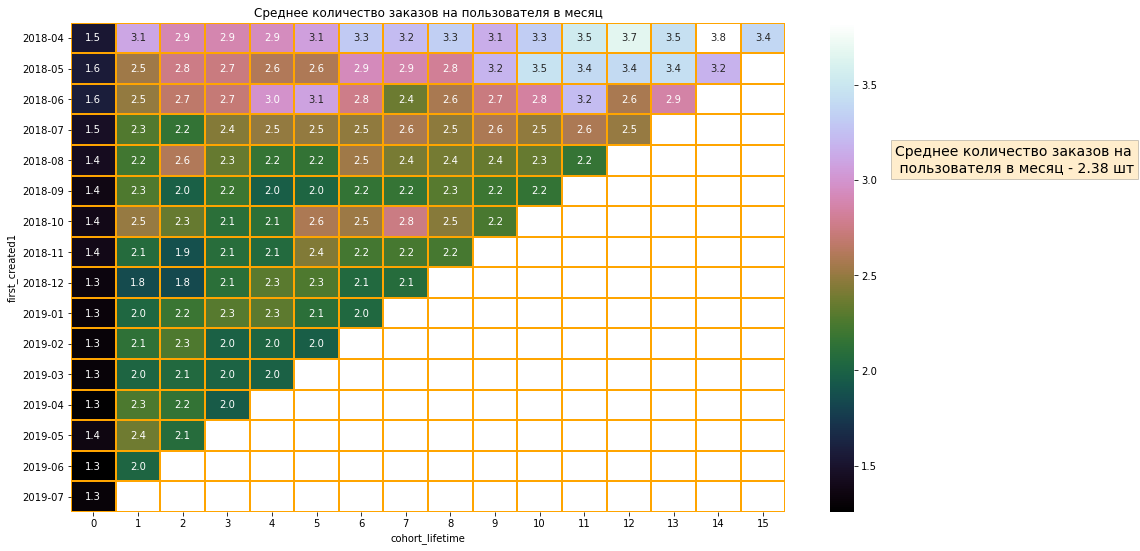

In [43]:
plt.figure(figsize=(16, 9))
plt.title('Среднее количество заказов на пользователя в месяц')
sns.heatmap(purchase_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='orange', cmap="cubehelix");
text = plt.text(0.84, 0.65, 'Среднее количество заказов на\n пользователя в месяц - {:.2f} шт'.
                format(mean_value),
                bbox=dict(facecolor='orange', alpha=0.2),
                fontsize=14, transform=plt.gcf().transFigure)

Первая и вторая когорта является безусловным лидером на количеству заказов на пользователя в месяц от 3 до 4 заказов делают пользователи в месяц. В среднем же 2.38 заказа приходится на пользователя. Это неплохой результат.

На основе когортного анализа по среднему количеству заказов на пользователя в месяц рекомендую:
- изучить более внимательно две первые когорты - у них отличный Retention и среднее количество заказов в месяц. Что именно привлекает пользователей возвращаться и делать такое большое количество заказов, что эти пользователи заказывают, в какое время, где и т.д. На основе этой информации можно будет проверить на остальных когортах - действительно это работает или нет.


In [44]:
purchase_pivot.to_csv('pt.csv', encoding='cp1251', sep=',')

### Посчитаем средний чек для когорт

In [45]:
first_order_month = d.groupby('id').agg({'first_created1':'min'}).reset_index()
first_order_month.columns=['id', 'first_session_buy']

In [46]:
first_order_month.head()

,id,first_session_buy
0,00013ea6-3379-4f02-893f-7a1a07ffc824,2018-08
1,0001e8f2-2d9f-41e2-93cd-47b08387c660,2018-06
2,00027cdf-6d78-450d-8237-51ee7695d5e1,2018-12
3,0003fb3f-6526-4939-ae43-8bb1685e58d3,2018-07
4,000483c2-590f-4bec-85ba-176c69cc7115,2019-06


In [47]:
cohort_sizes = first_order_month.groupby('first_session_buy').agg({'id':'nunique'}).reset_index()
cohort_sizes.columns=['first_session_buy', 'n_buyers']

In [48]:
order_monthly = d.merge(first_order_month, on='id')
cohorts = order_monthly.groupby(['created_m', 'first_session_buy', 'cohort_lifetime']).agg({'final_price':'sum', 'id':'count'}).reset_index()

In [49]:
mean_check = pd.merge(cohorts, cohort_sizes, on='first_session_buy')

In [50]:
mean_check['mean_check'] = mean_check['final_price'] / mean_check['id']
mean_check['first_session_buy'] = mean_check['first_session_buy'].dt.strftime('%Y-%m')
mean_price = mean_check['final_price'].mean()
mean_check_pivot = mean_check.pivot_table(index="first_session_buy", columns="cohort_lifetime", values='mean_check')
mean_check_pivot.fillna('').reset_index()

cohort_lifetime,first_session_buy,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2018-04,1349.985950,1459.56,1423.24,1389.42,1383.29,1427.87,1437.35,1441.84,1636.92,1606.06,1631.46,1601.86,1484.59,1530.82,1504.85,1472.91
1,2018-05,1262.373664,1291.45,1311.5,1292.8,1315.4,1314.91,1315.56,1360.49,1410.07,1364.23,1365.38,1261.97,1367.08,1516.94,1489.58,
2,2018-06,1257.749030,1248.68,1276.77,1298.43,1317.67,1399.24,1545.3,1507.08,1573.03,1455.9,1437.6,1393.33,1493.12,1500.72,,
3,2018-07,1249.302941,1348.93,1346.55,1364.57,1401.01,1526.63,1509.03,1574.41,1612.21,1614,1525.63,1627.07,1694.65,,,
4,2018-08,1136.605179,1189.67,1194.74,1301.13,1405.34,1398.77,1460.71,1452.94,1454.31,1469.81,1393.68,1564.72,,,,
5,2018-09,1118.176226,1295.94,1295.66,1369.81,1443.04,1508.01,1491.14,1512.04,1416.81,1479.34,1478.28,,,,,
6,2018-10,1060.409119,1097.88,1118.68,1203.75,1415.37,1358.94,1354.98,1380.67,1346.42,1506.26,,,,,,
7,2018-11,992.517976,1042.87,1120.79,1345.82,1437.32,1309.9,1304.7,1332.89,1364.12,,,,,,,
8,2018-12,1037.012352,1130.29,1396.66,1352.98,1347.44,1389.56,1434.25,1388.09,,,,,,,,
9,2019-01,1125.762535,1375.26,1415.06,1439.67,1484.15,1566.95,1524.99,,,,,,,,,


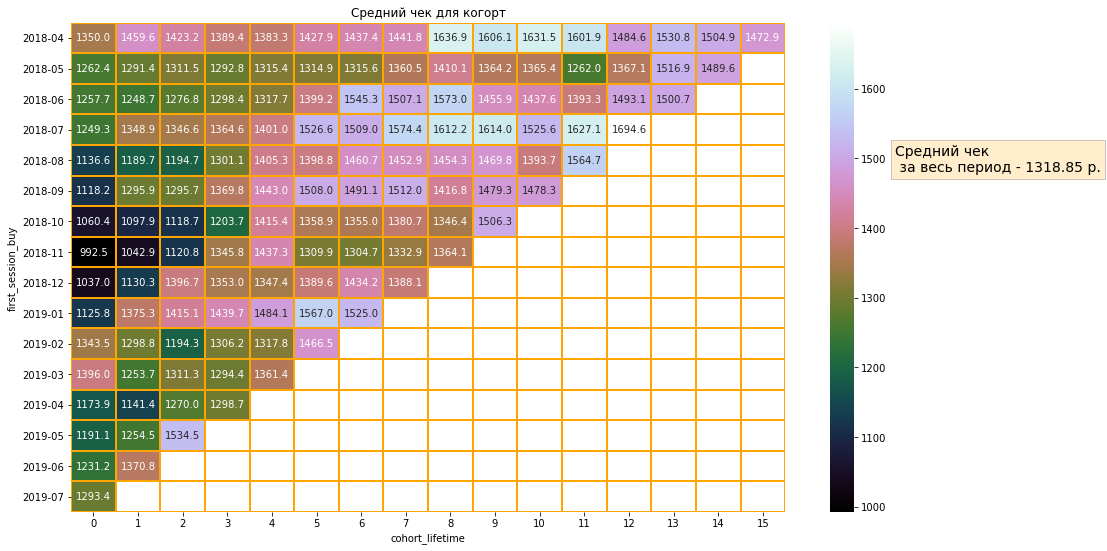

In [51]:
plt.figure(figsize=(16, 9))
plt.title('Средний чек для когорт')
sns.heatmap(mean_check_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='orange', cmap="cubehelix")
text = plt.text(0.84, 0.65, 'Средний чек \n за весь период - {:.2f} р.'.
                format(mean_price),
                bbox=dict(facecolor='orange', alpha=0.2),
                fontsize=14, transform=plt.gcf().transFigure);

Средний чек довольно неплохой за весь период - 1318,85 рублей. Опять же лидером является первая когорта, также есть хорошие месяцы в 3 и 4 когорте. Заметен сильный просадок у 8 и 9 когорты в ноябре и декабре - при том, что это были первые месяцы использования приложения. Далее ситуация выправилась, но незначительно. Можно попробовать сделать более активную рекламу или промокоды для этой группы пользователей для увеличения среднего чека. 

На основе выше изложенного вывода рекомендую:
- сделать акцент на пользователях, находящихся в когортах, где средний чек ниже среднего за последний месяц активности: когорта 2019-07, 2019-04
- также более детально изучить, почему у когорт 2018-11 и 2018-12 такой низкий средний чек в первые месяцы. Может быть в этот период не было промоакций, мало рекламы или же это были внешние факты (предновогодние праздники)

In [52]:
mean_check_pivot.to_csv('mcp.csv', encoding='cp1251', sep=',')

# Вывод и рекомендации

Основываясь на предоставленных данных можно сказать, что:
- пользователи достаточно активно пользуются приложением - 233 заказа в день за весь период. Однако периодически заметны большие просадки и, если посмотреть на график, видно, что в июле 2019 количество заказов начало понижаться. Стоит обратить на это внимание
- средний чек также довольно неплохой - 1318 рублей. Однако если предположить, что средний чек у пользователей, которые совершают оплату разными способами - отличается, гипотеза подтверждается. Рекомендую сделать акцент на пользователях, которых оплачивает партнерской картой и с помощью android-pay. Возможно как-то простимулировать пользователей сделать заказ на бОльшую сумму, чтобы выравнять средние чеки.
- Retention у пользователей колеблется от 6.8% до 45.9%. Во втором случае это просто отличный показатель. 6.8% - это довольно маленький Retention. Необходимо сделать акцент на этих пользователях. Возможно добавить их в рекламную кампанию, чтобы почаще напоминать о приложении или сделать для них акционные предложения, чтобы простимулировтаь их к совершению заказа через приложение
- количество заказов в среднем на пользователя в среднем 2,38 - это довольно неплохо. Однако если обратить внимание - то в первой когорте это значение выше от 3 до 4. Возможно следует дополнительно проанализировать каким способом привлекались эти пользователи, как часто они используют промокоды и почему они совершают больше заказов в приложении. Также стоит подробно изучить почему пользователи НЕ делают такое количество заказов в приложении в других когортах. Вполне вероятно, что им чего-то не хватает в приложении или сталкиваются с какими-то трудностями.
- если посмотреть средний чек по когортам, то наблюдается положительная динамика почти в каждй когорте. Со временем средний чек увеличивается. Следует обратить внимание на 12 когорту - у нее замечается увеличение среднего чека, но незначительно. Необходимо держать ее на контроле. А также обратить внимание на первые месяцы 8 и 9 когорты - их средний чек значительно меньше, чем у всех остальных. Стоит более подробно изучить этих пользователей: какими каналами они привлекались, использовали ли промокоды, что они заказывали. Для данной группы определенно необходимо добавлять какие-то индивидуальные предложение для увеличения среднего чека.

